# Viajes del asensor

El siguiente problema consiste en encontrar el número mínimo de viajes que debe realizar un ascensor para llevar a N personas al último piso. El ascensor sólo soporta un peso `Wmax` y la entrada consiste en una lista de personas $\{w_0,w_1,...,w_n\}$ que representa el peso de cada persona.

## Permutaciones
El problema se puede resolver encontrando todas las formas de combinar el peso de casa pasajero con el peso de los demás. Esta aproximación tendría una complejidad de $O(n!n)$. Pero la función factorial crece a una velocidad increíble.

## Subconjuntos
Existe otra forma de atacar el problema que consiste en probar todos los subconjuntos de la lista de pasajeros. Esto se diferencia a la aproximación anterior en el hecho de que los subconjuntos se prueban una sola vez. Si permutamos a través de todas las posibilidades, van a haber subconjuntos repetidos.

$pasajeros = \{1,2,3,4\}$  

Permutación del pasajero 1:
* 1
* 1 2
* 1 3
* 1 2 3
* ...  

Permutación del pasajero 2:
* 2
* 2 1
* 2 3
* 2 1 3
  
El subconjunto $\{1,2,3\}$ sólo se registraría una vez y este punto de vista maneja una complejidad de $O(n^2n)$

In [1]:
import matplotlib.pyplot as plt

Quiero mostrar el crecimiento de ambos puntos de vista para mostrar la diferencia de rendimiento. Voy a declarar ambas funciones de complejidad.

In [9]:
def permutaciones_aprox(x):
    y = 1
    for i in range(1,x):
        y *= x
    return y*x

In [10]:
def subconjuntos_aprox(x):
    return x**2*x

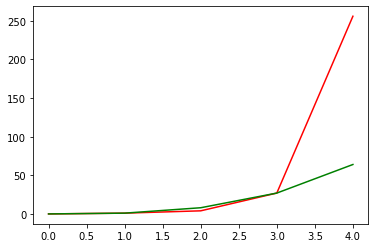

In [21]:
n = range(5)
#Y mayúscula para referirme al vector
Y_permutaciones = []
Y_subconjuntos = []
for x in n:
    Y_permutaciones.append(permutaciones_aprox(x))
    Y_subconjuntos.append(subconjuntos_aprox(x))
plt.plot(Y_permutaciones,'red')
plt.plot(Y_subconjuntos,'green')

En rojo se puede ver el crecimiento explosivo de la función factorial en comparación a la función exponencial.

## Entendiendo la solución
Esta aproximación es un tanto confusa, así que voy a tratar de ser lo más claro posible. Vamos a manejar un "vector" binario de longitud n. En realidad no es un vector, será un número entero, para evitar desperdiciar espacio. Pero visualizar el vector binario será muy importante.

Si tenemos 4 pasajeros tendríamos un vector `[0,0,0,0]`, si usamos un `for` que vaya desde 0 a 15 vamos a iterar sobre distintos subconjuntos. 
* 1 = `[0,0,0,1]`
* 5 = `[0,1,0,1]`
* 6 = `[0,1,1,0]`
* 15 = `[1,1,1,1]`

Cada 1 va a representar al pasajero que subirá en cada ocasión. Sumamos el peso de cada pasajero y vemos si no superan el máximo soportado por el ascensor.

### Programación dinámica
Los pasos para que aplicar un enfoque de programación dinámica son: memoria y recursivida. Las soluciones pequeñas deben ayudar a llegar a grandes soluciones.  
En este caso vamos a utilizar un punto de vista donde por cada pasajero, vamos a ver cuál es el número mínimo de viajes que se necesita para llevar todos los pasajeros que están antes de él. Almacenando también el peso del último viaje. De esta forma veremos si el pasajero actual puede subirse al ascensor junto con el peso anterior, o debe realizar un nuevo viaje.